In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import re

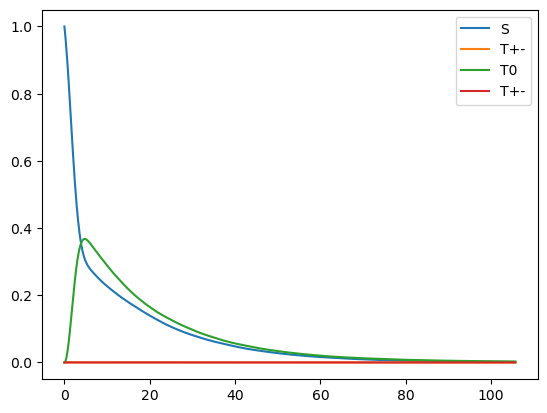

In [2]:
fieldon = np.loadtxt('fieldon_real.txt')

plt.plot(fieldon[:, 0], fieldon[:, 1:])
plt.legend(['S',"T+-","T0","T+-"])

plt.show()

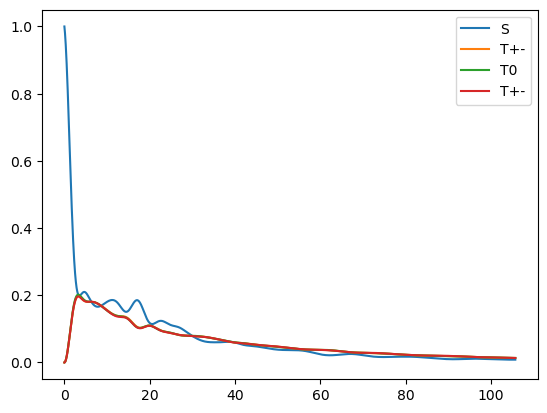

In [3]:
fieldoff = np.loadtxt('fieldoff_real.txt')

plt.plot(fieldoff[:, 0], fieldoff[:, 1:])
plt.legend(['S',"T+-","T0","T+-"])

plt.show()

In [4]:
ns = 4
a = 1
b = 3
kappa_diag = [a]+ [b]*(ns-1)
print(kappa_diag)

[1, 3, 3, 3]


In [5]:
def listkap_matkappa(kappa_diag, kappa_upper_right):
    ''' Calculate the kappa matrix from the list of diagonal and upper right non-diagonal kappas.
    '''

    matkappa = np.zeros((ns,ns))
    triangle = np.triu(np.ones((ns, ns), dtype=bool), k=1)
    matkappa[triangle] = kappa_upper_right  # Populate upper right non-diagonal elements
    matkappa += matkappa.T  # Symmetric adjustment
    for i in range(ns):
        matkappa[i, i] = -kappa_diag[i] - np.sum(matkappa[i, :])
    return matkappa

In [8]:
ns=int(2)
kappa_diag_values = [2, 2]
kappa_upper_right_values = [0.1]

result_matrix = listkap_matkappa(kappa_diag_values, kappa_upper_right_values)

print(result_matrix)

[[-2.1  0.1]
 [ 0.1 -2.1]]


In [11]:
gamma_e = 176.0859644  # gyromagnetic ratio of free electron spin in mT^-1 mus^-1

In [25]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import least_squares
from optimizer_spins import Optimizer
import pandas as pd

['Time', '1', '2', '3', '4']
     Time        1         2         3         4
0  0.0000  1.00000  0.000000  0.000000  0.000000
1  0.0002  0.99577  0.000078  0.000083  0.000078
2  0.0004  0.99119  0.000255  0.000332  0.000254
3  0.0006  0.98653  0.000401  0.000744  0.000401
4  0.0008  0.98200  0.000411  0.001319  0.000410
5  0.0010  0.97761  0.000278  0.002054  0.000277


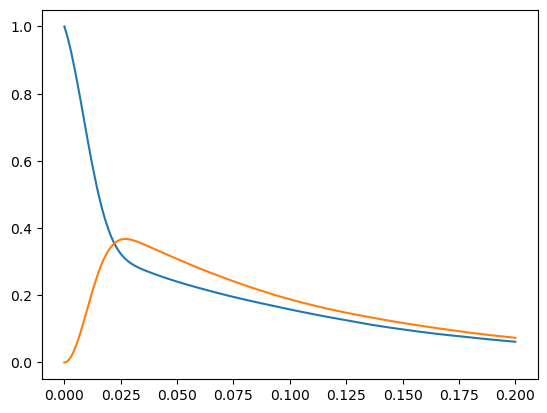

In [31]:
column_names = ["Time"]
data_path = "/u/dem/kebl6911/Part-II/spin_systems/fieldon_real.txt"

for i in range(1,5):
    column_names.append(str(i))
print(column_names)
df = pd.read_csv(data_path, delimiter="\t", names=column_names, usecols=range(len(column_names)))
df['Time'] = df['Time'] / gamma_e

print(df.head(6))

values = df.values

start_to_t1 = df[df["Time"]<=0.2]
t1_to_t2 = df[df["Time"]>0.2]
t1_to_t2 = t1_to_t2.values
t1_to_t2 = t1_to_t2[:,0]

start_to_t1_val = start_to_t1.values 
start_to_t1_time = start_to_t1_val[:,0]
start_to_t1_pop = start_to_t1_val[:,1:]


#removing last two collumns
start_to_t1_val = np.delete(start_to_t1_val, [-1, -3], axis=1)
start_to_t1_pop = np.delete(start_to_t1_pop, [-1, -3], axis=1) 

full_time = df["Time"].values # Unit of first time col assumed to be in ns

plt.plot(start_to_t1_time,start_to_t1_pop)

In [40]:
save_kappas = []
save_neg = []

optimize_init = Optimizer(start_to_t1_val,2,20,0.5, initial_kappas=None) #Ks and Kt in per microsecond
rms, optimized_kappas= optimize_init.run()
print(rms)
save_kappas.append(optimized_kappas)

p0 = optimize_init.p0
save_neg.append(optimize_init.time_size*7)
save_kappas = np.array(save_kappas)

print(p0)
print(save_kappas)
print(values[0])

0.6449752812233003
[0.061749 0.073365]
[[1.69357476e-21]]
[0. 1. 0. 0. 0.]


In [39]:
predict = optimize_init.predict(p0, t1_to_t2,'forward', save_kappas)

plt.plot(values[:,0],values[:,1:], "-")

plt.plot(t1_to_t2,predict[:,0:], "-.")

%plt.axvline(0.15)

plt.show

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions